# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import linregress

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [4]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


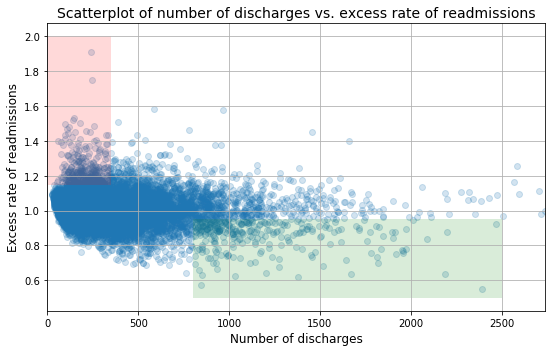

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
clean_hospital_read_df 

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
df = clean_hospital_read_df
#Extracting two columns:
df = df[pd.to_numeric(df['Number of Discharges'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Excess Readmission Ratio'], errors='coerce').notnull()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


### Question A: Do you agree with the above analysis and recommendations? Why or why not?

##### A) The initial observations based on the plot are True. However, these observations are not proved statistically.  B) While calculating Mean excess readmission rate, hospitals/facilities of 100 <= number of discharges <=1000 are not considered or left out. C) In the Conslusion, it is based only on the scatter plot. However, conslusion should be proved with hypothesis and statistical tests also. D) In the Recommendations, small capacity hospitals (< 300) are given. However, in statistics, hospitals (< 100) are considered. This suggests, recommendations given have no evidence. 

### Question B: Provide support for your arguments and your own recommendations with a statistically sound analysis:

###  i) : Setup an appropriate hypothesis test.

In [10]:
x = df['Number of Discharges']
y = df['Excess Readmission Ratio']

In [11]:
#generating bootstrap replicate:
def bs_replicate_1d(data, func):
    #compute bootstrap sample:
    bs_sample= np.random.choice(data, size=len(data))
    return func(bs_sample)

In [12]:
#generating many bootstrap replicate:
def draw_bs_reps(data, func, size=1):
    """draw bootstrap replicates"""
    #initialize an array:
    bs_replicates=np.empty(size)
    #bootstrap replicate func using for loop:
    for i in range(size):
        bs_replicates[i]= bs_replicate_1d(data, func)
    return bs_replicates    

In [13]:
#Extracting 'Number of Discharges' <100:
df_100= df[df['Number of Discharges']<100]

In [14]:
df_100['Excess Readmission Ratio'].describe()

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

In [15]:
#Extracting 'Number of Discharges' <300:
df_300= df[df['Number of Discharges']<300]

In [16]:
df_300['Excess Readmission Ratio'].describe()

count    6108.000000
mean        1.014238
std         0.082478
min         0.760200
25%         0.961100
50%         1.006850
75%         1.056525
max         1.909500
Name: Excess Readmission Ratio, dtype: float64

In [17]:
#Extracting 'Number of Discharges' >1000:
df_1000= df[df['Number of Discharges']>1000]

In [18]:
df_1000['Excess Readmission Ratio'].describe()

count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

In [19]:
bs_replicates = draw_bs_reps(df['Excess Readmission Ratio'], np.mean, size=1000)
p_value = np.sum(bs_replicates > df_100['Excess Readmission Ratio'].mean())/len(bs_replicates)
p_value

0.0

##### This p_value suggests that the true mean of 'Excess Readmission Ratio' for 'Number of Discharges' <100 being just due to chance is 0.0. Thus, there is a significant impact between the Number of Discharges and Exess Readmission Rate.

In [20]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [21]:
#Pearson correlation coefficient
r= pearson_r(x, y)
r

-0.09739794351079353

slope = -2.901051733057071e-05 Excess Readmission Ratio /Number of Discharges
intercept = 1.0181061473733573 Excess Readmission Rate


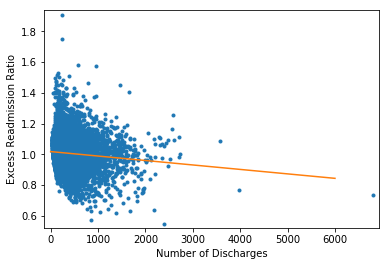

In [22]:
# Plot the illiteracy rate versus fertility
plt.plot(x, y, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Make theoretical line to plot
x2 = np.array([0,6000])
y2 = a * x2 + b

# Print the results to the screen
print('slope =', a, 'Excess Readmission Ratio /Number of Discharges')
print('intercept =', b, 'Excess Readmission Rate')

# Add regression line to your plot
plt.plot(x2, y2)

In [23]:
#Ecexuting linregress using the scipy:
linregress(x, y)

LinregressResult(slope=-2.9010517330570697e-05, intercept=1.018106147373357, rvalue=-0.09739794351079352, pvalue=1.2225473776734486e-25, stderr=2.7649127349110587e-06)

### ii) : Compute and report the observed significance value (or p-value).

##### As we see the Linear Regression and Pearson Correlation Coefficient above. The linregress line is almost horizontal and pvalue is very low. This suggests that there is a very low correlation between the Number of Discharges and Exess Readmission Rate.

### iii) : Report statistical significance for  α  = .01.

##### Based on the reported pvalue of 1.22e-25 in comparison with statistical significance for α = .01, there is a significant impact between the Number of Discharges and Exess Readmission Rate.

In [24]:
# Create a new column
df['label'] = "default"

In [25]:
# Label the column for number of discharges.
df.loc[df['Number of Discharges'] < 100, 'label'] = "<100"
df.loc[(df['Number of Discharges'] >= 100) & (df['Number of Discharges'] < 300), 'label'] = "100-300"
df.loc[(df['Number of Discharges'] >= 300) & (df['Number of Discharges'] < 1000), 'label'] = "300-1000"
df.loc[(df['Number of Discharges'] >= 1000) & (df['Number of Discharges'] < 2000), 'label'] = "1000-2000"
df.loc[df['Number of Discharges'] > 2000, 'label'] = '>3000'

Text(0.5,1,'Excess Readmission Ratio for Number of Discharges')

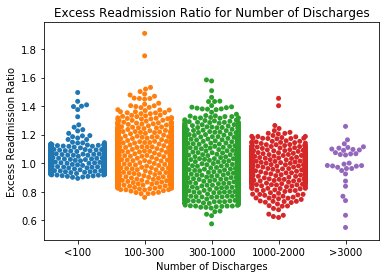

In [26]:
# Executing a Swarm Plot
import seaborn as sns
sns.swarmplot(x='label', y='Excess Readmission Ratio', data=df)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Excess Readmission Ratio for Number of Discharges')

In [27]:
def draw_bs_pairs_linreg(x3, y3, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x3))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x3[bs_inds], y3[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [28]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df['Number of Discharges'].values, df['Excess Readmission Ratio'].values, 1000)
np.percentile(bs_slope_reps, [2.5, 97.5])

array([-3.58928659e-05, -2.16745376e-05])